In [3]:
import numpy as np

# 原始矩陣
matrix = np.array([[1, 1, 1],
                   [2, 2, 2],
                   [3, 3, 3]])

# 重複 2 次
result = np.repeat(matrix, 2, axis=0)  # 沿行方向（`axis=0`）重複每一行 2 次

print(result)


[[1 1 1]
 [1 1 1]
 [2 2 2]
 [2 2 2]
 [3 3 3]
 [3 3 3]]


In [4]:

import numpy as np
from numpy.lib.stride_tricks import sliding_window_view

# 模擬 5 條信號，每條信號有 1000 個點
data = np.array([[1,2,30,4,50,6,7,80,9,10,110,12],
                 [1,2,30,4,50,6,7,80,9,10,110,12]])
window_size = 3  # 滑動窗口大小

# 創建滑動窗口，形狀為 (條數, 窗口數, 窗口大小)
windows = sliding_window_view(data, window_shape=window_size, axis=1)

# 計算滑動標準差，結果形狀為 (條數, 窗口數)
std_results = np.std(windows, axis=-1)

# 將結果填充回與原始數據相同大小的陣列
padded_std_results = np.full(data.shape, np.nan)
padded_std_results[:, window_size-1:] = std_results

print(padded_std_results)
padded_std_results = padded_std_results[:, ~np.isnan(padded_std_results).all(axis=0)]
print()
print(padded_std_results)

[[        nan         nan 13.4412301  12.75408431 18.83259586 21.2289111
  20.51016008 34.65063732 33.950945   33.23652609 47.37791328 46.6761895 ]
 [        nan         nan 13.4412301  12.75408431 18.83259586 21.2289111
  20.51016008 34.65063732 33.950945   33.23652609 47.37791328 46.6761895 ]]

[[13.4412301  12.75408431 18.83259586 21.2289111  20.51016008 34.65063732
  33.950945   33.23652609 47.37791328 46.6761895 ]
 [13.4412301  12.75408431 18.83259586 21.2289111  20.51016008 34.65063732
  33.950945   33.23652609 47.37791328 46.6761895 ]]


In [12]:
from dataset_library import PPGDataset, PCA_dataset, PPGDataset2
from torch.utils.data import DataLoader
import torch.nn as nn
import torch
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import ptwt
import numpy as np

In [13]:

aug_factor = 50

mode = 'Max-Abs Scaling'
pca_n_components =16
pca_mode = 'Raw'
chunk_size = 1000
shift_step = 100
#pca_mode = 'Standardization'
pca_mode  = 'Self-Standardization'

train_set = PPGDataset2(data_dir = '../train', compare_type = 'Physic', chunk_size = chunk_size, shift_step = shift_step, 
                       pca_mode = pca_mode, pca_n_components = pca_n_components)

valid_set = PPGDataset2(data_dir = '../valid', compare_type = 'Physic', chunk_size = chunk_size, shift_step = shift_step, 
                       pca_mode = pca_mode, pca_n_components = pca_n_components)
"""

train_set = PPGDataset2(data_dir = '../train', compare_type = 'Psycho', chunk_size = chunk_size, shift_step = shift_step, 
                       pca_mode = pca_mode, pca_n_components = pca_n_components)

valid_set = PPGDataset2(data_dir = '../valid', compare_type = 'Psycho', chunk_size = chunk_size, shift_step = shift_step, 
                       pca_mode = pca_mode, pca_n_components = pca_n_components)
"""

"""
train_set = PPGDataset(data_dir = '../train', compare_type = 'Psycho', chunk_size = chunk_size, shift_step = shift_step, 
                       pca_mode = pca_mode, pca_n_components = pca_n_components)

valid_set = PPGDataset(data_dir = '../valid', compare_type = 'Psycho', chunk_size = chunk_size, shift_step = shift_step, 
                       pca_mode = pca_mode, pca_n_components = pca_n_components)
"""

#train_set = PCA_dataset(data_dir = '../train', normalize = True)
#valid_set = PCA_dataset(data_dir = '../valid', normalize = True)


VOLO
VOLO


"\ntrain_set = PPGDataset(data_dir = '../train', compare_type = 'Psycho', chunk_size = chunk_size, shift_step = shift_step, \n                       pca_mode = pca_mode, pca_n_components = pca_n_components)\n\nvalid_set = PPGDataset(data_dir = '../valid', compare_type = 'Psycho', chunk_size = chunk_size, shift_step = shift_step, \n                       pca_mode = pca_mode, pca_n_components = pca_n_components)\n"

In [4]:
print(train_set.ppgs.shape)

torch.Size([26100, 1000])


In [5]:
print(valid_set.ppgs.shape)

torch.Size([4640, 1000])


In [3]:
train_set.curvatures.shape

(26100, 998)

In [5]:

train_set.returns.shape

torch.Size([26100, 999])

In [6]:
train_set.ppg_volatility.shape

torch.Size([26100, 900])

In [7]:
train_set.ppgs_pca.shape

torch.Size([26100, 16])

In [8]:
print(train_set.ppgs_pca.shape, valid_set.ppgs_pca.shape)

torch.Size([26100, 16]) torch.Size([4640, 16])


In [4]:
print(train_set.LF_RF_ratio.shape, valid_set.LF_RF_ratio.shape)

torch.Size([13340, 2]) torch.Size([2320, 2])


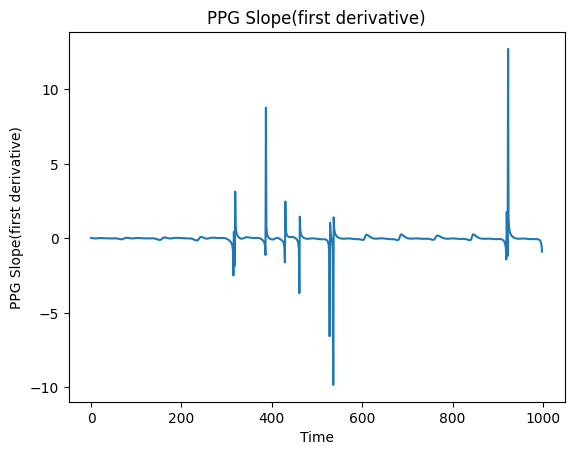

In [43]:
plt.plot(train_set.returns[1])
plt.title("PPG Slope(first derivative)")

# 添加 X 軸和 Y 軸標籤（可選）
plt.xlabel("Time")
plt.ylabel("PPG Slope(first derivative)")

# 顯示圖表
plt.show()

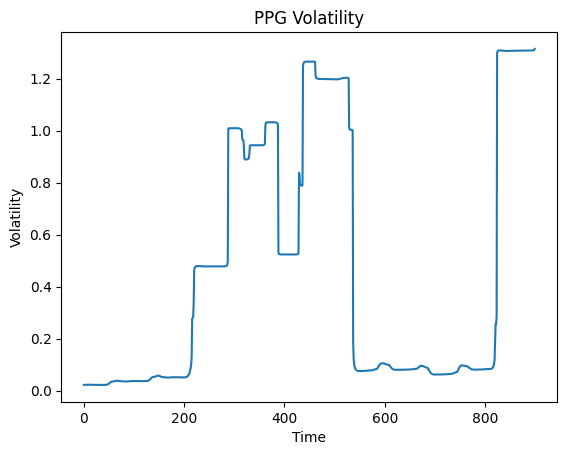

In [42]:
plt.plot(train_set.ppg_volatility[1])
# 添加標題
plt.title("PPG Volatility")

# 添加 X 軸和 Y 軸標籤（可選）
plt.xlabel("Time")
plt.ylabel("Volatility")

# 顯示圖表
plt.show()

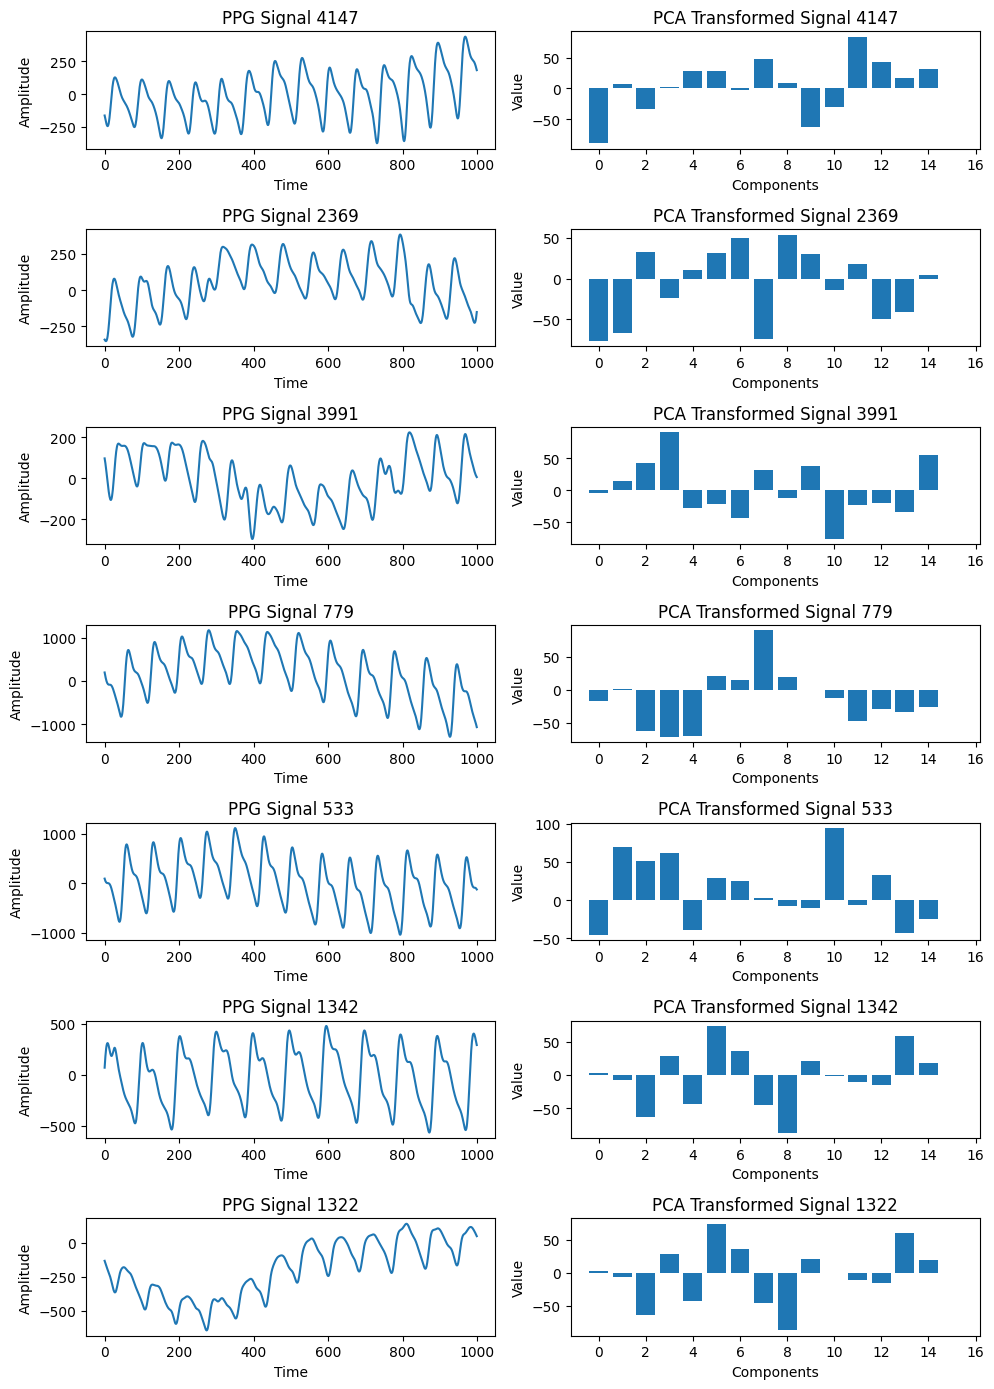

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 假設 ppgs 和 ppgs_pca 是你的 NumPy 陣列
data_set = valid_set
#data_set = train_set

ppgs = data_set.ppgs
ppgs_pca = data_set.ppgs_pca

# 隨機排列索引，取前 5 個索引
indices = np.array(range(len(data_set)))
np.random.shuffle(indices)

num_rows = 7
indices = indices[:num_rows]  # 取前 5 個索引

# 設定圖的行數和列數

fig, axes = plt.subplots(num_rows, 2, figsize=(10, num_rows * 2))

# 繪製 PPG 和 PCA
for idx, i in enumerate(indices):
    # 繪製 PPG 信號
    axes[idx, 0].plot(-ppgs[i])
    axes[idx, 0].set_title(f'PPG Signal {i}')
    axes[idx, 0].set_xlabel('Time')
    axes[idx, 0].set_ylabel('Amplitude')

    # 繪製 PCA 轉換後的信號（柱狀圖）
    axes[idx, 1].bar(range(len(ppgs_pca[i])), -ppgs_pca[i])
    axes[idx, 1].set_title(f'PCA Transformed Signal {i}')
    axes[idx, 1].set_xlabel('Components')
    axes[idx, 1].set_ylabel('Value')

# 自動調整子圖之間的間距
plt.tight_layout()
plt.show()


In [23]:
from numpy.lib.stride_tricks import sliding_window_view

# 模擬數據
data = np.random.randn(50)

# 滑動窗口視圖
window_size = 20

windows = sliding_window_view(data, window_shape=window_size)

# 計算每個窗口的標準差
std_results = np.full(len(data), np.nan)  # 預設為 NaN
std_results[window_size - 1:] = np.std(windows, axis=1)


std_results = std_results[~np.isnan(std_results)]
std_results 

array([0.79759676, 0.81126812, 0.96851616, 0.966659  , 0.95030021,
       1.00039863, 1.02627386, 1.0490264 , 1.02355536, 1.00046197,
       1.00290807, 1.06013142, 1.05341384, 1.08809573, 1.10277287,
       1.02326303, 1.10965921, 1.13656175, 1.13713938, 1.14077295,
       1.13950038, 1.15135977, 1.02854602, 1.04247359, 1.03927766,
       1.00970539, 0.98925482, 1.01884381, 1.0081909 , 1.00937753,
       1.07795231])

In [7]:
class Classifier_MLP(nn.Module):
    def __init__(self):
        super(Classifier_MLP, self).__init__()
        # Encoder: 將 400 維壓縮到 20 維
        self.encoder = nn.Sequential(
            nn.Linear(400, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.BatchNorm1d(16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.BatchNorm1d(8),
            nn.ReLU(),
            nn.Linear(8, 4),
            nn.BatchNorm1d(4),
            nn.ReLU(),
            nn.Linear(4, 2),
        )

    def forward(self, x):
        encoded = self.encoder(x)
        return encoded

In [8]:
import torch.nn as nn

class Classifier_MLP2(nn.Module):
    def __init__(self):
        super(Classifier_MLP2, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(400, 200),
            nn.BatchNorm1d(200),
            nn.ReLU(),
            nn.Dropout(p=0.3),  # 加入 Dropout，p 是隨機關閉的比例

            nn.Linear(200, 100),
            nn.BatchNorm1d(100),
            nn.ReLU(),
            nn.Dropout(p=0.3),  # 加入 Dropout，p 是隨機關閉的比例
            
            nn.Linear(100, 50),
            nn.BatchNorm1d(50),
            nn.ReLU(),
            nn.Dropout(p=0.3),  # 再次加入 Dropout
            nn.Linear(50, 2),
        )

    def forward(self, x):
        encoded = self.encoder(x)
        return encoded


In [9]:
class LSTM_BinaryClassifier(nn.Module):
    def __init__(self, input_size=1, hidden_size=128, num_layers=2, dropout=0.5):
        super(LSTM_BinaryClassifier, self).__init__()
        
        # LSTM 層
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, 
                            num_layers=num_layers, batch_first=True, dropout=dropout)
        
        # 全連接層
        self.fc = nn.Sequential(
            nn.Linear(hidden_size, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(dropout),
            nn.Linear(64, 2)
        )
    
    def forward(self, x):
        # LSTM 前向傳播
        lstm_out, (H_n, c_n) = self.lstm(x)
        
        # 使用 LSTM 最後一層的最後一個時間步的輸出
        last_output = lstm_out[:, -1, :]
        
        # 經過全連接層
        logits = self.fc(last_output)
        
        return logits


In [10]:
import torch.nn as nn

class Classifier_MLP2(nn.Module):
    def __init__(self):
        super(Classifier_MLP2, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(33, 128),
            nn.BatchNorm1d(128),
            nn.LeakyReLU(0.01),

            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.LeakyReLU(0.01),

            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.LeakyReLU(0.01),

            nn.Linear(32, 16),
            nn.LeakyReLU(0.01),

            nn.Linear(16, 2)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        return encoded


In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN_BinaryClassifier(nn.Module):
    def __init__(self):
        super(CNN_BinaryClassifier, self).__init__()
        
        # 卷積層 1
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=4, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm1d(4)
        
        # 池化層
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        
        # 全連接層
        self.fc1 = nn.Linear(4 * 60, 64)  # 2 * 30 是 MaxPooling 後的輸出
        self.fc2 = nn.Linear(64, 2)
        # 處理 ratio 的全連接層
        self.ratio_fc1 = nn.Linear(2, 4)
        #self.ratio_fc2 = nn.Linear(2, 2)
        
        # 最終的全連接層
        self.last_fc = nn.Linear(4+2, 2)
        
    def forward(self, x, ratio):
        # x 形狀: (batch_size, 60)
        x = x.unsqueeze(1)  # 轉換為 (batch_size, 1, 60)
        
        # 卷積 + BN + Leaky ReLU + MaxPooling
        x = F.leaky_relu(self.bn1(self.conv1(x)))  # 替換為 Leaky ReLU
        #x = self.pool(x)  # MaxPooling
        
        # 展平為 (batch_size, 2 * 30)
        x = x.view(x.size(0), -1)
        #print(x.shape)
        x = F.leaky_relu(self.fc1(x))  # 使用 Leaky ReLU
        x = F.leaky_relu(self.fc2(x))
        # 處理 ratio
        
        #ratio = F.leaky_relu(self.ratio_fc1(ratio))  # (batch_size, 2)
        #ratio = F.leaky_relu(self.ratio_fc2(ratio))  # (batch_size, 2)
        
        # 合併 x 和 ratio
        #combined = torch.cat((x, ratio), dim=1)  # (batch_size, 4)
        #print(x.shape)
        x[:, -1] *= ratio.squeeze(-1)*2
        # 最終輸出
        #return self.last_fc(combined)
        return x

# 測試模型
model = CNN_BinaryClassifier()
dummy_input = torch.randn(8, 60)  # 批次大小 8，每個樣本 60 維特徵
RATIO = torch.randn(8, 1)  # 批次大小 8，每個樣本 2 維 ratio
output = model(dummy_input, RATIO)
print("輸出形狀:", output.shape)  # 應為 [8, 2]


輸出形狀: torch.Size([8, 2])


In [60]:
# train = 0.77
# valid = 0.64

class CNN_BinaryClassifier(nn.Module):
    def __init__(self):
        super(CNN_BinaryClassifier, self).__init__()
        
        # 卷積層 1
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=8, kernel_size=3, stride=2, padding=1)
        self.bn1 = nn.BatchNorm1d(8)
        
        # 卷積層 2
        self.conv2 = nn.Conv1d(in_channels=8, out_channels=16, kernel_size=3, stride=2, padding=1)
        self.bn2 = nn.BatchNorm1d(16)
        
        # 池化層
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        
        # Dropout 層
        self.dropout = nn.Dropout(0.5)
        
        # 全連接層
        self.fc1 = nn.Linear(16* 62, 60)  # 32 個特徵圖，每個特徵圖長度為 8（33 維經池化後的近似結果）
        self.fc2 = nn.Linear(60+60, 2)       # 2 類別

        self.bn3 = nn.BatchNorm1d(100)
        
    def forward(self, x, pca):
        # x 形狀: (batch_size, 33)
        x = x.unsqueeze(1)  # 轉換為 (batch_size, 1, 33)
        
        x = self.pool(F.relu(self.bn1(self.conv1(x))))  # (batch_size, 16, 16)
        x = self.pool(F.relu(self.bn2(self.conv2(x))))  # (batch_size, 32, 8)
        #print(x.shape)
        x = x.view(x.size(0), -1)  # 展平為 (batch_size, 32 * 8)
        """
        print('Before')
        print(f"mean(x) = {x.mean():.3f} std(x) = {x.std():.3f}")
        print(f"mean(pca) = {pca.mean():.3f} std(pca) = {pca.std():.3f} \n")
        """
        
        #x = self.fc1(x) is good
        x = self.fc1(x)

        """
        print('After')
        print(f"mean(x) = {x.mean():.3f} std(x) = {x.std():.3f}")
        print(f"mean(pca) = {pca.mean():.3f} std(pca) = {pca.std():.3f} \n")
        """
        #print(x.shape)
        x =  torch.cat((x, pca), dim=1)
        
        #print(x.shape)
        x = self.fc2(x)  # 輸出 (batch_size, 2)
        
        return x

# 測試模型
model = CNN_BinaryClassifier()
dummy_input = torch.randn(8, 1000)  # 批次大小 8，每個樣本 60 維特徵
pca = torch.randn(8, 60)  # 批次大小 8，每個樣本 2 維 ratio
output = model(dummy_input, pca)
print("輸出形狀:", output.shape)  # 應為 [8, 2]

輸出形狀: torch.Size([8, 2])


In [4]:
# 0.68 0.68

class CNN_BinaryClassifier(nn.Module):
    def __init__(self):
        super(CNN_BinaryClassifier, self).__init__()
        
        # 卷積層 1
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=6, kernel_size=3, stride=2, padding=1)
        self.bn1 = nn.BatchNorm1d(6)
        
        # 卷積層 2
        self.conv2 = nn.Conv1d(in_channels=6, out_channels=12, kernel_size=3, stride=2, padding=1)
        self.bn2 = nn.BatchNorm1d(12)
        
        # 池化層
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        
        
        # 全連接層
        self.fc1 = nn.Linear(12* 62, 60)  # 32 個特徵圖，每個特徵圖長度為 8（33 維經池化後的近似結果）
        self.fc2 = nn.Linear(60+116, 2)       # 2 類別

        self.bn3 = nn.BatchNorm1d(100)

        self.pca_fc1 = nn.Linear(8*29, 60)
        self.pca_conv = nn.Conv1d(in_channels=1, out_channels=4, kernel_size=3, stride=2)
        
        
    def forward(self, x, pca):
        # x 形狀: (batch_size, 33)
        x = x.unsqueeze(1)  # 轉換為 (batch_size, 1, 33)
        
        x = self.pool(F.relu(self.bn1(self.conv1(x))))  # (batch_size, 16, 16)
        x = self.pool(F.relu(self.bn2(self.conv2(x))))  # (batch_size, 32, 8)
        #print(x.shape)
        
        x = x.view(x.size(0), -1)  # 展平為 (batch_size, 32 * 8)

        
        #x = self.fc1(x) is good
        x = self.fc1(x)

        pca = self.pca_conv(pca.unsqueeze(1))
        pca = pca.view(pca.size(0), -1)
        x =  torch.cat((x, pca), dim=1)
        
        #print(x.shape)
        x = self.fc2(x)  # 輸出 (batch_size, 2)

        
        return x

# 測試模型
model = CNN_BinaryClassifier()
dummy_input = torch.randn(8, 1000)  # 批次大小 8，每個樣本 60 維特徵
pca = torch.randn(8, 60)  # 批次大小 8，每個樣本 2 維 ratio
lfrf_ratio = torch.randn(8,2)
output = model(dummy_input, pca)

print("輸出形狀:", output.shape)  # 應為 [8, 2]

輸出形狀: torch.Size([8, 2])


In [142]:
# EXP 

class CNN_BinaryClassifier(nn.Module):
    def __init__(self):
        super(CNN_BinaryClassifier, self).__init__()
        
        # 卷積層 1
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=6, kernel_size=3, stride=2, padding=1)
        self.bn1 = nn.BatchNorm1d(6)
        
        # 卷積層 2
        self.conv2 = nn.Conv1d(in_channels=6, out_channels=12, kernel_size=3, stride=2, padding=1)
        self.bn2 = nn.BatchNorm1d(12)
        
        # 池化層
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        
        
        # 全連接層
        self.fc1 = nn.Linear(12* 62, 60)  # 32 個特徵圖，每個特徵圖長度為 8（33 維經池化後的近似結果）
        self.fc2 = nn.Linear(60+116, 8)       # 2 類別

        self.bn3 = nn.BatchNorm1d(100)

        self.pca_fc1 = nn.Linear(8*29, 60)
        self.pca_conv = nn.Conv1d(in_channels=1, out_channels=4, kernel_size=3, stride=2)

        self.last_fc = nn.Linear(2+4,2)
        self.ratio_fc = nn.Linear(2,4)
        
    def forward(self, x, pca, lfrf_ratio):
        # x 形狀: (batch_size, 33)
        x = x.unsqueeze(1)  # 轉換為 (batch_size, 1, 33)
        
        x = self.pool(F.relu(self.bn1(self.conv1(x))))  # (batch_size, 16, 16)
        x = self.pool(F.relu(self.bn2(self.conv2(x))))  # (batch_size, 32, 8)
        #print(x.shape)
        
        x = x.view(x.size(0), -1)  # 展平為 (batch_size, 32 * 8)

        
        #x = self.fc1(x) is good
        x = self.fc1(x)

        pca = self.pca_conv(pca.unsqueeze(1))
        pca = pca.view(pca.size(0), -1)
        #pca = self.pca_fc1(pca)
        #print(pca.shape)
        x =  torch.cat((x, pca), dim=1)
        
        #print(x.shape)
        x = self.fc2(x)  # 輸出 (batch_size, 2)

        lfrf_ratio = self.ratio_fc(lfrf_ratio)
        x = torch.cat((x, lfrf_ratio), dim=1)
        x = self.last_fc(x)
        
        return x

# 測試模型
model = CNN_BinaryClassifier()
dummy_input = torch.randn(8, 1000)  # 批次大小 8，每個樣本 60 維特徵
pca = torch.randn(8, 60)  # 批次大小 8，每個樣本 2 維 ratio
lfrf_ratio = torch.randn(8,2)
output = model(dummy_input, pca, lfrf_ratio)

print("輸出形狀:", output.shape)  # 應為 [8, 2]

輸出形狀: torch.Size([8, 2])


In [184]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN_BinaryClassifier(nn.Module):
    def __init__(self):
        super(CNN_BinaryClassifier, self).__init__()
        
        # 卷積層 1
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=6, kernel_size=3, stride=2, padding=1)
        self.bn1 = nn.BatchNorm1d(6)
        
        # 卷積層 2
        self.conv2 = nn.Conv1d(in_channels=6, out_channels=12, kernel_size=3, stride=2, padding=1)
        self.bn2 = nn.BatchNorm1d(12)
        
        # 池化層
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        
        # 全連接層
        self.fc1 = nn.Linear(12 * 62, 60)
        self.bn_fc1 = nn.BatchNorm1d(60)  # 加入全連接層的 Batch Normalization
        
        self.fc2 = nn.Linear(60 + 60, 2)
        self.bn_fc2 = nn.BatchNorm1d(2)  # 為輸出層加入 Batch Normalization（可選）

        # PCA 處理部分
        self.pca_fc1 = nn.Linear(4 * 29, 60)
        self.bn_pca = nn.BatchNorm1d(60)  # 為 PCA 部分的輸出加入 Batch Normalization
        self.pca_conv = nn.Conv1d(in_channels=1, out_channels=4, kernel_size=3, stride=2)

    def forward(self, x, pca):
        # x 形狀: (batch_size, 1000)
        x = x.unsqueeze(1)  # 轉換為 (batch_size, 1, 1000)
        
        # 卷積 + BN + ReLU + 池化
        x = self.pool(F.relu(self.bn1(self.conv1(x))))  # (batch_size, 6, 500)
        x = self.pool(F.relu(self.bn2(self.conv2(x))))  # (batch_size, 12, 250)
        
        # 展平為 (batch_size, 12 * 62)
        x = x.view(x.size(0), -1)
        x = F.relu(self.bn_fc1(self.fc1(x)))  # 全連接層 + BN
        #print(x.shape)
        
        # 處理 PCA 特徵
        pca = self.pca_conv(pca.unsqueeze(1))  # (batch_size, 4, x)
        #print(pca.shape)
        pca = pca.view(pca.size(0), -1)  # 展平
        #print(pca.shape)
        pca = F.relu(self.bn_pca(self.pca_fc1(pca)))  # PCA 全連接層 + BN
        #print(pca.shape)
        # 合併 PCA 和主特徵
        x = torch.cat((x, pca), dim=1)  # (batch_size, 60 + 116)

        # 輸出層
        x = self.fc2(x)
        x = self.bn_fc2(x)  # 可選：加入輸出層的 Batch Normalization
        
        return x

# 測試模型
model = CNN_BinaryClassifier()
dummy_input = torch.randn(8, 1000)  # 批次大小 8，每個樣本 1000 維特徵
pca = torch.randn(8, 60)  # 批次大小 8，每個樣本 PCA 特徵
output = model(dummy_input, pca)

print("輸出形狀:", output.shape)  # 應為 [8, 2]


輸出形狀: torch.Size([8, 2])


In [11]:
# EXP

class CNN_BinaryClassifier(nn.Module):
    def __init__(self):
        super(CNN_BinaryClassifier, self).__init__()
        
        # 卷積層 1
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=6, kernel_size=3, stride=2, padding=1)
        self.bn1 = nn.BatchNorm1d(6)
        
        # 卷積層 2
        self.conv2 = nn.Conv1d(in_channels=6, out_channels=12, kernel_size=3, stride=2, padding=1)
        self.bn2 = nn.BatchNorm1d(12)
        
        # 池化層
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        
        
        # 全連接層
        self.fc1 = nn.Linear(12* 62, 60)  # 32 個特徵圖，每個特徵圖長度為 8（33 維經池化後的近似結果）
        self.fc2 = nn.Linear(60+116, 2)       # 2 類別

        self.bn3 = nn.BatchNorm1d(100)

        self.pca_fc1 = nn.Linear(8*29, 60)
        self.pca_conv = nn.Conv1d(in_channels=1, out_channels=4, kernel_size=3, stride=2)
        
        
    def forward(self, x, pca):
        # x 形狀: (batch_size, 33)
        x = x.unsqueeze(1)  # 轉換為 (batch_size, 1, 33)
        
        x = self.pool(F.relu(self.bn1(self.conv1(x))))  # (batch_size, 16, 16)
        x = self.pool(F.relu(self.bn2(self.conv2(x))))  # (batch_size, 32, 8)
        #print(x.shape)
        
        x = x.view(x.size(0), -1)  # 展平為 (batch_size, 32 * 8)

        
        #x = self.fc1(x) is good
        x = self.fc1(x)

        pca = self.pca_conv(pca.unsqueeze(1))
        pca = pca.view(pca.size(0), -1)
        x =  torch.cat((x, pca), dim=1)
        
        #print(x.shape)
        x = self.fc2(x)  # 輸出 (batch_size, 2)

        
        return x

# 測試模型
model = CNN_BinaryClassifier()
dummy_input = torch.randn(8, 1000)  # 批次大小 8，每個樣本 60 維特徵
pca = torch.randn(8, 60)  # 批次大小 8，每個樣本 2 維 ratio
lfrf_ratio = torch.randn(8,2)
output = model(dummy_input, pca)

print("輸出形狀:", output.shape)  # 應為 [8, 2]

輸出形狀: torch.Size([8, 2])


In [65]:
# EXP PHYSIC

class CNN_BinaryClassifier(nn.Module):
    def __init__(self):
        super(CNN_BinaryClassifier, self).__init__()
        
        # 卷積層 1
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=2, kernel_size=3, stride=2, padding=1)
        self.bn1 = nn.BatchNorm1d(2)
        
        # 卷積層 2
        self.conv2 = nn.Conv1d(in_channels=2, out_channels=4, kernel_size=3, stride=2, padding=1)
        self.bn2 = nn.BatchNorm1d(4)
        
        # 池化層
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        
        
        # 全連接層
        self.fc1 = nn.Linear(4* 62, 60)  # 32 個特徵圖，每個特徵圖長度為 8（33 維經池化後的近似結果）
        


        
        self.pca_conv1 = nn.Conv1d(in_channels=1, out_channels=2, kernel_size=3, stride=2)
        self.pca_bn1 = nn.BatchNorm1d(2)
        self.pca_conv2 = nn.Conv1d(in_channels=2, out_channels=4, kernel_size=3, stride=2)
        self.pca_bn2 = nn.BatchNorm1d(4)
        self.pca_fc1 = nn.Linear(4*14, 60)

        self.last_fc1 = nn.Linear(60+60, 2)
        self.last_fc2 = nn.Linear(4,2)

        self.LeakyReLU = nn.LeakyReLU()
        
        
    def forward(self, x, pca, LF_RF_ratio):
        # x 形狀: (batch_size, 33)
        x = x.unsqueeze(1)  # 轉換為 (batch_size, 1, 33)
        
        x = self.pool(self.LeakyReLU(self.bn1(self.conv1(x))))  # (batch_size, 16, 16)
        x = self.pool(self.LeakyReLU(self.bn2(self.conv2(x))))  # (batch_size, 32, 8)
        #print(x.shape)
        
        x = x.view(x.size(0), -1)  # 展平為 (batch_size, 32 * 8)

        
        #x = self.fc1(x) is good
        x = self.LeakyReLU(self.fc1(x))

        pca = pca.unsqueeze(1)
        pca = self.LeakyReLU(self.pca_bn1(self.pca_conv1(pca)))
        pca = self.LeakyReLU(self.pca_bn2(self.pca_conv2(pca)))
        
        pca = pca.view(pca.size(0), -1)
        pca = self.LeakyReLU(self.pca_fc1(pca))

        x =  torch.cat((x, pca), dim=1)
        
        #print(x.shape)
        x = self.last_fc1(x)  # 輸出 (batch_size, 2)

        x = torch.cat((x, LF_RF_ratio), dim=1)
        x = self.last_fc2(x)
        
        return x

# 測試模型
model = CNN_BinaryClassifier()
dummy_input = torch.randn(8, 1000)  # 批次大小 8，每個樣本 60 維特徵
pca = torch.randn(8, 60)  # 批次大小 8，每個樣本 2 維 ratio
lf_rf_ratio = torch.randn(8, 2)
output = model(dummy_input, pca, lf_rf_ratio)

print("輸出形狀:", output.shape)  # 應為 [8, 2]

輸出形狀: torch.Size([8, 2])


In [15]:
# EXP PHYSIC lr = 0.02    0.92 0.84 lr = 0.02

class CNN_BinaryClassifier(nn.Module):
    def __init__(self):
        super(CNN_BinaryClassifier, self).__init__()
        
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=4, kernel_size=10, stride=4, padding=1)
        self.bn1 = nn.BatchNorm1d(4)
        self.conv2 = nn.Conv1d(in_channels=4, out_channels=8, kernel_size=10, stride=4, padding=1)
        self.bn2 = nn.BatchNorm1d(8)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)

        
        self.re_conv1 = nn.Conv1d(in_channels=1, out_channels=4, kernel_size=10, stride=4, padding=1)
        self.re_bn1 = nn.BatchNorm1d(4)
        self.re_conv2 = nn.Conv1d(in_channels=4, out_channels=8, kernel_size=10, stride=4, padding=1)
        self.re_bn2 = nn.BatchNorm1d(8)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        


        
        self.pca_conv1 = nn.Conv1d(in_channels=1, out_channels=2, kernel_size=4, stride=2, padding=1)
        self.pca_bn1 = nn.BatchNorm1d(2)
        self.pca_conv2 = nn.Conv1d(in_channels=2, out_channels=4, kernel_size=4, stride=2, padding=1)
        self.pca_bn2 = nn.BatchNorm1d(4)



        

        self.last_fc1 = nn.Linear(120+120+12, 2)


        self.LeakyReLU = nn.LeakyReLU()
        
        
    def forward(self, x, pca, re):
        # x 形狀: (batch_size, 33)
        x = x.unsqueeze(1)  # 轉換為 (batch_size, 1, 33)
        x = self.pool(self.LeakyReLU(self.bn1(self.conv1(x))))  # (batch_size, 16, 16)
        x = self.pool(self.LeakyReLU(self.bn2(self.conv2(x))))  # (batch_size, 32, 8)
        x = x.view(x.size(0), -1)  # 展平為 (batch_size, 32 * 8)
        #print(x.shape)

        re = re.unsqueeze(1)  # 轉換為 (batch_size, 1, 33)
        re = self.pool(self.LeakyReLU(self.re_bn1(self.re_conv1(re))))  # (batch_size, 16, 16)
        re = self.pool(self.LeakyReLU(self.re_bn2(self.re_conv2(re))))  # (batch_size, 32, 8)
        re = re.view(re.size(0), -1)  # 展平為 (batch_size, 32 * 8)
        #print(re.shape)

        pca = pca.unsqueeze(1)  # 轉換為 (batch_size, 1, 33)
        pca = self.pool(self.LeakyReLU(self.pca_bn1(self.pca_conv1(pca))))  # (batch_size, 16, 16)
        pca = self.pool(self.LeakyReLU(self.pca_bn2(self.pca_conv2(pca))))  # (batch_size, 32, 8)
        pca = pca.view(pca.size(0), -1)  # 展平為 (batch_size, 32 * 8)
        
        #print(pca.shape)

        x =  torch.cat((x, re, pca), dim=1)
        
        #print(x.shape)
        x = self.last_fc1(x)  # 輸出 (batch_size, 2)
        
        return x

# 測試模型
model = CNN_BinaryClassifier()
dummy_input = torch.randn(256, 1000)  # 批次大小 8，每個樣本 60 維特徵
pca = torch.randn(256, 60)  # 批次大小 8，每個樣本 2 維 ratio
returns = torch.randn(256, 999)
output = model(dummy_input, pca, returns)

print("輸出形狀:", output.shape)  # 應為 [8, 2]


輸出形狀: torch.Size([256, 2])


In [47]:
# EXP PHYSIC GOOD

class CNN_BinaryClassifier(nn.Module):
    def __init__(self):
        super(CNN_BinaryClassifier, self).__init__()
        
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=4, kernel_size=10, stride=4, padding=1)
        self.bn1 = nn.BatchNorm1d(4)
        self.conv2 = nn.Conv1d(in_channels=4, out_channels=8, kernel_size=10, stride=4, padding=1)
        self.bn2 = nn.BatchNorm1d(8)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)

        
        self.re_conv1 = nn.Conv1d(in_channels=1, out_channels=4, kernel_size=10, stride=4, padding=1)
        self.re_bn1 = nn.BatchNorm1d(4)
        self.re_conv2 = nn.Conv1d(in_channels=4, out_channels=8, kernel_size=10, stride=4, padding=1)
        self.re_bn2 = nn.BatchNorm1d(8)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        


        
        self.vol_conv1 = nn.Conv1d(in_channels=1, out_channels=2, kernel_size=4, stride=2, padding=1)
        self.vol_bn1 = nn.BatchNorm1d(2)
        self.vol_conv2 = nn.Conv1d(in_channels=2, out_channels=4, kernel_size=4, stride=2, padding=1)
        self.vol_bn2 = nn.BatchNorm1d(4)



        

        self.last_fc1 = nn.Linear(120+120+224, 2)


        self.LeakyReLU = nn.LeakyReLU()
        
        
    def forward(self, x, re, vol):
        # x 形狀: (batch_size, 33)
        x = x.unsqueeze(1)  # 轉換為 (batch_size, 1, 33)
        x = self.pool(self.LeakyReLU(self.bn1(self.conv1(x))))  # (batch_size, 16, 16)
        x = self.pool(self.LeakyReLU(self.bn2(self.conv2(x))))  # (batch_size, 32, 8)
        x = x.view(x.size(0), -1)  # 展平為 (batch_size, 32 * 8)
        #print(x.shape)

        re = re.unsqueeze(1)  # 轉換為 (batch_size, 1, 33)
        re = self.pool(self.LeakyReLU(self.re_bn1(self.re_conv1(re))))  # (batch_size, 16, 16)
        re = self.pool(self.LeakyReLU(self.re_bn2(self.re_conv2(re))))  # (batch_size, 32, 8)
        re = re.view(re.size(0), -1)  # 展平為 (batch_size, 32 * 8)
        #print(re.shape)

        vol = vol.unsqueeze(1)  # 轉換為 (batch_size, 1, 33)
        vol = self.pool(self.LeakyReLU(self.vol_bn1(self.vol_conv1(vol))))  # (batch_size, 16, 16)
        vol = self.pool(self.LeakyReLU(self.vol_bn2(self.vol_conv2(vol))))  # (batch_size, 32, 8)
        vol = vol.view(vol.size(0), -1)  # 展平為 (batch_size, 32 * 8)
        
        #print(vol.shape)

        y =  torch.cat((x, re, vol), dim=1)
        
        #print(x.shape)
        y = self.last_fc1(y)  # 輸出 (batch_size, 2)
        
        return y

# 測試模型
model = CNN_BinaryClassifier()
dummy_input = torch.randn(256, 1000)  # 批次大小 8，每個樣本 60 維特徵
returns = torch.randn(256, 999)
vol = torch.randn(256, 900)
output = model(dummy_input, returns, vol)

print("輸出形狀:", output.shape)  # 應為 [8, 2]


輸出形狀: torch.Size([256, 2])


In [8]:
# EXP PHYSIC GOOD2

class CNN_BinaryClassifier(nn.Module):
    def __init__(self):
        super(CNN_BinaryClassifier, self).__init__()
        
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=4, kernel_size=10, stride=4, padding=1)
        self.bn1 = nn.BatchNorm1d(4)
        self.conv2 = nn.Conv1d(in_channels=4, out_channels=8, kernel_size=10, stride=4, padding=1)
        self.bn2 = nn.BatchNorm1d(8)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)

        
        self.re_conv1 = nn.Conv1d(in_channels=1, out_channels=4, kernel_size=10, stride=4, padding=1)
        self.re_bn1 = nn.BatchNorm1d(4)
        self.re_conv2 = nn.Conv1d(in_channels=4, out_channels=8, kernel_size=10, stride=4, padding=1)
        self.re_bn2 = nn.BatchNorm1d(8)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        


        
        self.vol_conv1 = nn.Conv1d(in_channels=1, out_channels=2, kernel_size=10, stride=4, padding=1)
        self.vol_bn1 = nn.BatchNorm1d(2)
        self.vol_conv2 = nn.Conv1d(in_channels=2, out_channels=4, kernel_size=10, stride=4, padding=1)
        self.vol_bn2 = nn.BatchNorm1d(4)

        self.cur_conv1 = nn.Conv1d(in_channels=1, out_channels=2, kernel_size=10, stride=4, padding=1)
        self.cur_bn1 = nn.BatchNorm1d(2)
        self.cur_conv2 = nn.Conv1d(in_channels=2, out_channels=4, kernel_size=10, stride=4, padding=1)
        self.cur_bn2 = nn.BatchNorm1d(4)



        

        self.last_fc1 = nn.Linear(120+120+52+60, 2)


        self.LeakyReLU = nn.LeakyReLU()
        
        
    def forward(self, x, re, vol, cur):
        # x 形狀: (batch_size, 33)
        x = x.unsqueeze(1)  # 轉換為 (batch_size, 1, 33)
        x = self.pool(self.LeakyReLU(self.bn1(self.conv1(x))))  # (batch_size, 16, 16)
        x = self.pool(self.LeakyReLU(self.bn2(self.conv2(x))))  # (batch_size, 32, 8)
        x = x.view(x.size(0), -1)  # 展平為 (batch_size, 32 * 8)
        #print(x.shape)

        re = re.unsqueeze(1)  # 轉換為 (batch_size, 1, 33)
        re = self.pool(self.LeakyReLU(self.re_bn1(self.re_conv1(re))))  # (batch_size, 16, 16)
        re = self.pool(self.LeakyReLU(self.re_bn2(self.re_conv2(re))))  # (batch_size, 32, 8)
        re = re.view(re.size(0), -1)  # 展平為 (batch_size, 32 * 8)
        #print(re.shape)

        vol = vol.unsqueeze(1)  # 轉換為 (batch_size, 1, 33)
        vol = self.pool(self.LeakyReLU(self.vol_bn1(self.vol_conv1(vol))))  # (batch_size, 16, 16)
        vol = self.pool(self.LeakyReLU(self.vol_bn2(self.vol_conv2(vol))))  # (batch_size, 32, 8)
        vol = vol.view(vol.size(0), -1)  # 展平為 (batch_size, 32 * 8)\
        #print(vol.shape)

        cur = cur.unsqueeze(1)  # 轉換為 (batch_size, 1, 33)
        cur = self.pool(self.LeakyReLU(self.cur_bn1(self.cur_conv1(cur))))  # (batch_size, 16, 16)
        cur = self.pool(self.LeakyReLU(self.cur_bn2(self.cur_conv2(cur))))  # (batch_size, 32, 8)
        cur = cur.view(cur.size(0), -1)  # 展平為 (batch_size, 32 * 8)
        
        #print(cur.shape)

        y =  torch.cat((x, re, vol, cur), dim=1)
        
    
        y = self.last_fc1(y)  # 輸出 (batch_size, 2)
        
        return y

# 測試模型
model = CNN_BinaryClassifier()
dummy_input = torch.randn(256, 1000)  # 批次大小 8，每個樣本 60 維特徵
returns = torch.randn(256, 999)
vol = torch.randn(256, 900)
cur = torch.randn(256, 998)
output = model(dummy_input, returns, vol, cur)

print("輸出形狀:", output.shape)  # 應為 [8, 2]


輸出形狀: torch.Size([256, 2])


In [179]:
import ptwt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
from scipy.fft import fft, fftfreq
import time
############## GPU

class Wavelet:
    # 設定參數
    fs = 100  # 取樣頻率 (Hz)
    wavelet = 'cmor4.0-3.0'  # GOOD
    scales = np.geomspace(40, 1000, num=300)  # 更細化的尺度間隔
    device = torch.device('cuda:2' if torch.cuda.is_available() else 'cpu')
    
    def __init__(self, signal):
        #self.signal = torch.tensor(signal, dtype=torch.float32, device=self.device)  # 將信號移至GPU
        self.signal = signal.clone().detach().to(self.device).to(torch.float32)  # 使用 clone().detach() 並移動到指定的 GPU 設備


        # 使用 ptwt 套件執行 CWT
        self.coef, self.freqs = ptwt.continuous_transform.cwt(self.signal, self.scales, wavelet=self.wavelet, sampling_period=1/self.fs)
        self.coef = torch.abs(self.coef)
        

        # 假設 self.coef 的原始形狀是 (freq num, batch size, time num)
        # 使用 permute() 來交換 batch size 和 freq num
        self.coef = self.coef.permute(1, 0, 2)  # 改變形狀為 (batch size, freq num, time num)
        

        
        # 計算FFT
        fft_signal = torch.fft.fft(self.signal)
        #print(f'fft_signal = {fft_signal.shape}')
        fft_spectrum = torch.abs(fft_signal) / self.signal.shape[1] * 2  # 取 FFT 振幅
        wavelet_spectrum = torch.mean(self.coef, axis=2)  # 對時間軸取平均

        #print(f'coef {self.coef.shape}')
        #print(f'wavelet_spcetrum : {wavelet_spectrum.shape}')
        #print(f'fft_spectrum : {fft_spectrum.shape}')
        #print(f'np.max(wavelet_spectrum, axis=1) = {np.max(wavelet_spectrum, axis=1)}')
        #print(f'np.max(fft_spectrum.cpu().numpy(), axis=1) = {np.max(fft_spectrum.cpu().numpy(), axis=1)}')
       
        self.coef = self.coef / torch.max(wavelet_spectrum, keepdim=True, axis=1)[0].reshape(-1,1,1) \
                              * torch.max(fft_spectrum,     keepdim=True, axis=1)[0].reshape(-1,1,1)
        self.coef = self.coef.to(torch.float32)


    def Show(self, signal_seg, coef_seg):
        # 將片段轉換為GPU tensors
        signal_seg = signal_seg.clone().detach().to(self.device)  # 使用 clone().detach()
        coef_seg = coef_seg.clone().detach().to(self.device)  # 使用 clone().detach()
        #coef_seg = torch.tensor(coef_seg, dtype=torch.complex64, device=device)

        
        # 計算原始信號的 FFT 頻譜
        fft_spectrum = torch.abs(torch.fft.fft(signal_seg)) / len(signal_seg) * 2  # 取 FFT 振幅
        fft_freqs = torch.fft.fftfreq(len(signal_seg), 1/self.fs)  # 計算頻率軸
        fft_spectrum = fft_spectrum[:len(fft_freqs)//2]  # 只取正頻率部分
        fft_freqs = fft_freqs[:len(fft_freqs)//2]
        
        # 繪製原始信號的 FFT 頻譜
        plt.figure(figsize=(7, 3))
        plt.plot(fft_freqs.cpu().numpy(), fft_spectrum.cpu().numpy(), label="FFT Spectrum", color='red', linestyle='--')
        plt.title("Original Signal FFT Spectrum")
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Amplitude")
        plt.grid()
        plt.xlim(0, 5)  # 限制到感興趣的頻率範圍
        plt.legend()
        plt.tight_layout()
        plt.show()

        wavelet_spectrum = torch.mean(coef_seg, axis=1)  # 對時間軸取平均
        # 繪製小波計算的頻譜
        plt.figure(figsize=(7, 3))
        plt.plot(self.freqs, wavelet_spectrum.cpu().numpy(), label="Wavelet Spectrum", color='blue')
        plt.title(f"Wavelet Spectrum)")
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Amplitude")
        plt.grid()
        plt.xlim(0, 5)  # 限制到感興趣的頻率範圍
        plt.legend()
        plt.tight_layout()
        plt.show()
        
        # 使用 contoured scalogram
        plt.figure(figsize=(10, 4))
        plt.contourf(np.arange(len(signal_seg)) / self.fs, self.freqs, np.abs(coef_seg.cpu().numpy()), cmap='viridis', levels=100)
        plt.title("Wavelet Scalogram (Normalized)")
        plt.xlabel("Time (s)")
        plt.ylabel("Frequency (Hz)")
        plt.colorbar(label="Amplitude")
        plt.ylim(0, 5)  # 限制頻率範圍

    def Check_correctness(self):
        #print(f'self.signal = {self.signal.shape}')
        #print(f'self.coef = {self.coef.shape}')
        
        self.Show(self.signal[0][:1000]     , self.coef[0][:, :1000])
        self.Show(self.signal[0][1000:2000] , self.coef[0][:, 1000:2000])
        self.Show(self.signal[0]            , self.coef[0])


types = ['First_rest', 'Physic']
# 加載 PPG 信號
df = pd.read_csv('../Raw_clipped_process/35_PPG.csv')
TYPE = 'First_rest'  # 替換為你需要的訊號類型列名
device = torch.device('cuda:2' if torch.cuda.is_available() else 'cpu')
# 創建一個 numpy array，其中包含選擇的信號區段
signal = np.array([df[type].values[5000:7000] for type in types])
signal = np.vstack([signal] *32)  # 將 signal 這個陣列重複 10 次
#print(signal.shape)


start_time = time.perf_counter()


# 使用 GPU 加速的 Wavelet 類別
for i in range(1):
    wavelet = Wavelet(torch.from_numpy(signal))
    #wavelet.Check_correctness()


end_time = time.perf_counter()
elapsed_time = end_time - start_time
print(f"運行時間：{elapsed_time} 秒")

運行時間：0.1839924100204371 秒


In [180]:
import torch
import torch.nn as nn

class CNNBlock(nn.Module):
    """CNN區塊
    參數:
        in_channels: 輸入通道數
        out_channels: 輸出通道數
        kernel_size: 卷積核大小
    """
    def __init__(self, in_channels, out_channels, kernel_size):
        super().__init__()
        self.conv = nn.Conv1d(in_channels, out_channels, kernel_size, padding='same')
        self.bn = nn.BatchNorm1d(out_channels)  # 批次正規化
        self.relu = nn.ReLU()  # ReLU激活函數

    def forward(self, x):
        return self.relu(self.bn(self.conv(x)))

class TransformerBlock(nn.Module):
    """Transformer區塊
    參數:
        d_model: 模型維度
        nhead: 注意力頭數
        dim_feedforward: 前饋網路維度
    """
    def __init__(self, d_model, nhead, dim_feedforward=2048):
        super().__init__()
        # 多頭自注意力層
        self.self_attn = nn.MultiheadAttention(d_model, nhead)
        # 前饋網路
        self.feed_forward = nn.Sequential(
            nn.Linear(d_model, dim_feedforward),
            nn.ReLU(),
            nn.Linear(dim_feedforward, d_model)
        )
        # 層正規化
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(0.1)

    def forward(self, x):
        # 自注意力處理
        attn_output, _ = self.self_attn(x, x, x)
        x = self.norm1(x + self.dropout(attn_output))
        # 前饋網路處理
        ff_output = self.feed_forward(x)
        x = self.norm2(x + self.dropout(ff_output))
        return x

class PositionalEncoding(nn.Module):
    """位置編碼
    參數:
        d_model: 模型維度
        max_len: 最大序列長度
    """
    def __init__(self, d_model, max_len=5000):
        super().__init__()
        # 建立位置編碼矩陣
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-torch.log(torch.tensor(10000.0)) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        # 將位置編碼加到輸入上
        return x + self.pe[:x.size(0)]

class TransformerLSTMModel(nn.Module):
    """用於壓力檢測的Transformer-LSTM模型
    參數:
        input_channels: 輸入通道數
        hidden_dim: 隱藏層維度
        n_classes: 分類數量
    """
    def __init__(self, input_channels=1, hidden_dim=128, n_classes=2):
        super().__init__()
        
        # CNN部分
        self.initial_conv = CNNBlock(input_channels, 64, kernel_size=7)  # 初始卷積層
        self.pool = nn.Sequential(
            nn.MaxPool1d(2),  # 最大池化
            nn.AvgPool1d(2)   # 平均池化
        )
        
        # CNN區塊序列
        self.conv_blocks = nn.Sequential(
            CNNBlock(64, 128, kernel_size=3),
            CNNBlock(128, 128, kernel_size=3),
            CNNBlock(128, 128, kernel_size=3),
            CNNBlock(128, hidden_dim, kernel_size=3)
        )
        
        # Transformer部分
        self.pos_encoder = PositionalEncoding(hidden_dim)  # 位置編碼
        self.transformer = TransformerBlock(hidden_dim, nhead=8)  # Transformer區塊
        
        # LSTM部分
        self.lstm = nn.LSTM(hidden_dim, hidden_dim, batch_first=True)  # LSTM層
        self.dropout = nn.Dropout(0.2)  # Dropout防止過擬合
        
        # 分類頭
        self.classifier = nn.Linear(hidden_dim, n_classes)  # 全連接分類層
    
    def forward(self, x):
        # CNN特徵提取
        x = self.initial_conv(x)
        x = self.pool(x)
        x = self.conv_blocks(x)
        
        # 維度調整: (批次, 通道, 長度) -> (長度, 批次, 通道)
        x = x.permute(2, 0, 1)
        
        # Transformer處理
        x = self.pos_encoder(x)
        x = self.transformer(x)
        
        # 維度調整: (長度, 批次, 通道) -> (批次, 長度, 通道)
        x = x.permute(1, 0, 2)
        
        # LSTM處理
        lstm_out, _ = self.lstm(x)
        x = lstm_out[:, -1, :]  # 取最後一個時間步
        x = self.dropout(x)
        
        # 分類
        x = self.classifier(x)
        
        return x


# 建立模型
#model = TransformerLSTMModel(input_channels=1, hidden_dim=128, n_classes=2)
model = TransformerLSTMModel(input_channels=300, hidden_dim=128, n_classes=2)
# 範例輸入: 批次大小=32, 通道數=1, 序列長度=1000
x = torch.randn(32, 300, 1000)
    
# 前向傳播
output = model(x)
print(f"輸出形狀: {output.shape}") 

輸出形狀: torch.Size([32, 2])


In [185]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#model = LSTM_BinaryClassifier().to(device)
#model = CNN_BinaryClassifier()
#model = CNNBinaryClassifierPCA()


model = TransformerLSTMModel(input_channels=300, hidden_dim=16, n_classes=2)
#model = nn.DataParallel(model, device_ids=[0, 1, 2])  # 指定使用 GPU 0 和 GPU 1
model = model.to(device)
criterion = nn.CrossEntropyLoss()


batch_size = 64
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_set, batch_size=batch_size, shuffle=True)

In [189]:
"""
optimizer = torch.optim.Adam(
    model.parameters(),
    lr=0.01,
    weight_decay=1e-4
)
"""
optimizer = optim.SGD(model.parameters(), lr=0.005, momentum=0.9)
#optimizer = optim.AdamW(model.parameters(), lr=0.005, weight_decay=1e-4)

In [190]:
# 使用 ReduceLROnPlateau 調度器
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.8, patience=15)

In [191]:
n_epochs = 40000
count = 0
best_valid_loss = float('inf')  # 初始化最小的 Validation Loss

for i in range(n_epochs):
    model.train()
    train_loss = []
    train_accs = []
    start_time = time.perf_counter()
    for batch in train_loader:
        """
        abs_spectrums, ppg_segments, labels, LF_RF_ratio, pyscho_rest_ratio, returns, ppg_volatility, curvatures  = batch
        abs_spectrums, ppg_segments, labels, LF_RF_ratio, pyscho_rest_ratio, returns, ppg_volatility = \
                    abs_spectrums.to(device), ppg_segments.to(device), labels.to(device), \
                    LF_RF_ratio.to(device), pyscho_rest_ratio.to(device), returns.to(device), ppg_volatility.to(device)
        """
        ppg_segments, labels = batch
        ppg_segments, labels = ppg_segments.to(device), labels.to(device)
        #ppg_segments, labels = ppg_segments.to(device), labels.to(device)
        scalogram = Wavelet(ppg_segments).coef.to(device)
        #print(scalogram.shape)
        #ppg_segments = ppg_segments.unsqueeze(1)
        
        """
        ppgs_pca, labels = batch
        ppgs_pca, labels = ppgs_pca.to(device), labels.to(device)
        """
        
        #logits = model(ppgs_pca, pyscho_rest_ratio)
        #logits = model(ppg_segments, ppgs_pca, LF_RF_ratio)
        #logits = model(ppg_segments, ppgs_pca)
        #logits = model(ppg_segments, ppgs_pca, returns)
        #logits = model(ppg_segments, ppgs_pca, returns, ppg_volatility)
        #logits = model(ppg_segments, returns, ppg_volatility)
        #logits = model(ppg_segments, returns, ppg_volatility, cur)
        logits = model(scalogram)
        
        loss = criterion(logits, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        acc = (logits.argmax(dim=-1) == labels).float().mean()
        train_loss.append(loss.item())
        train_accs.append(acc)
        
    # 使用 scheduler 監控損失並調整學習率
    scheduler.step(loss)

    end_time = time.perf_counter()
    elapsed_time = end_time - start_time
    print(f"運行時間：{elapsed_time} 秒")



    
    model.eval()
    valid_loss = []
    valid_accs = []
    for batch in valid_loader:
        """
        abs_spectrums, ppg_segments, labels, LF_RF_ratio, pyscho_rest_ratio, returns, ppg_volatility, curvatures  = batch
        abs_spectrums, ppg_segments, labels, LF_RF_ratio, pyscho_rest_ratio, returns, ppg_volatility = \
                    abs_spectrums.to(device), ppg_segments.to(device), labels.to(device), \
                    LF_RF_ratio.to(device), pyscho_rest_ratio.to(device), returns.to(device), ppg_volatility.to(device)
        """
        ppg_segments, labels = batch
        ppg_segments, labels = ppg_segments.to(device), labels.to(device)
        #ppg_segments, labels = ppg_segments.to(device), labels.to(device)
        scalogram = Wavelet(ppg_segments).coef.to(device)
        #ppg_segments = ppg_segments.unsqueeze(1)
        #ppg_segments = ppg_segments.unsqueeze(2)
        

        """
        ppgs_pca, labels = batch
        ppgs_pca, labels = ppgs_pca.to(device), labels.to(device)
        """
        
        with torch.no_grad():
            #logits = model(ppgs_pca, pyscho_rest_ratio)
            #logits = model(ppg_segments, ppgs_pca, LF_RF_ratio)
            #logits = model(ppg_segments, ppgs_pca)
            #logits = model(ppg_segments, ppgs_pca, returns)
            #logits = model(ppg_segments, ppgs_pca, returns, ppg_volatility)
            #logits = model(ppg_segments, returns, ppg_volatility)
            #logits = model(ppg_segments, returns, ppg_volatility, cur)
            logits = model(scalogram)
        loss = criterion(logits, labels)
        acc = (logits.argmax(dim=-1) == labels).float().mean()
        valid_loss.append(loss.item())
        valid_accs.append(acc)

    count += 1
    #if True:
    if count % 2 == 1:
        print(f"Epoch = {i}")
        train_loss = sum(train_loss) / len(train_loss)
        train_acc = sum(train_accs) / len(train_accs)
        print(f"Train : loss = {train_loss:.5f}, acc = {train_acc:.5f}")
        current_lr = optimizer.param_groups[0]['lr']
        print(f"LR: {current_lr:.6f}")
        
        valid_loss = sum(valid_loss) / len(valid_loss)
        valid_acc = sum(valid_accs) / len(valid_accs)
        print(f"Valid : loss = {valid_loss:.5f}, acc = {valid_acc:.5f}")

        # 如果 Validation Loss 改善，保存模型
        if valid_loss < best_valid_loss:
            best_valid_loss = valid_loss
            torch.save(model.state_dict(), 'lstm_predict_model.pth')
            print(f"Best model saved at Epoch {i} with Validation Loss: {valid_loss:.5f}")


運行時間：73.48734206799418 秒
Epoch = 0
Train : loss = 0.40298, acc = 0.83580
LR: 0.005000
Valid : loss = 0.65878, acc = 0.71896
Best model saved at Epoch 0 with Validation Loss: 0.65878
運行時間：73.30359072401188 秒
運行時間：73.2906283060147 秒
Epoch = 2
Train : loss = 0.27686, acc = 0.88995
LR: 0.005000
Valid : loss = 0.59592, acc = 0.75300
Best model saved at Epoch 2 with Validation Loss: 0.59592
運行時間：73.30309969899827 秒
運行時間：73.28259379498195 秒
Epoch = 4
Train : loss = 0.23893, acc = 0.90320
LR: 0.005000
Valid : loss = 0.69291, acc = 0.73759
Epoch = 6
Train : loss = 0.20418, acc = 0.91586
LR: 0.005000
Valid : loss = 0.66221, acc = 0.75856
運行時間：73.26292416499928 秒
運行時間：73.25274849802372 秒
Epoch = 8
Train : loss = 0.19017, acc = 0.92002
LR: 0.005000
Valid : loss = 0.81505, acc = 0.75150
運行時間：73.35942434199387 秒
運行時間：73.29611835401738 秒
Epoch = 10
Train : loss = 0.17772, acc = 0.92426
LR: 0.005000
Valid : loss = 0.76981, acc = 0.76948
運行時間：73.26641576000839 秒
運行時間：73.2141378489905 秒
Epoch = 12
Train

KeyboardInterrupt: 

In [ ]:
chunk_size = 400
aug_factor = 50
batch_size = 64
mode = 'Max-Abs Scaling'
pca_n_components = 30
#pca_mode = 'Raw'
#pca_mode = 'Standardization'
pca_mode = 'Self-Standardization'

train_set = PPGDataset(data_dir = '../train', pca_mode = pca_mode, pca_n_components = pca_n_components)
valid_set = PPGDataset(data_dir = '../valid', pca_mode = pca_mode, pca_n_components = pca_n_components)


In [69]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
import torch
import numpy as np

# 在自身序列上進行標準化
def standardize_sequences(data):
    standardized_data = (data - np.mean(data, axis=1, keepdims=True)) / np.std(data, axis=1, keepdims=True)
    return standardized_data


# 1. 從 train_set 提取 PPG 特徵和標籤
train_ppgs = train_set.ppgs.numpy()  # 轉換為 NumPy 數組
valid_ppgs = valid_set.ppgs.numpy()

valid_labels = valid_set.labels
train_labels = train_set.labels      # 確保標籤為數字類型（如 0, 1）

train_ppgs_proc = standardize_sequences(train_ppgs)
valid_ppgs_proc = standardize_sequences(valid_ppgs)




# 2. 訓練 LDA 模型
lda = LinearDiscriminantAnalysis(n_components=1)  # 降維到 1 維
train_ppgs_lda = lda.fit_transform(train_ppgs_proc, train_labels)

# 3. 對 valid_set 進行 LDA 映射



valid_ppgs_lda = lda.transform(valid_ppgs_proc)

# 獲取 LDA 的特徵值
explained_variance_ratio = lda.explained_variance_ratio_

print("解釋方差比率:", explained_variance_ratio)
print("保留的總資訊比例:", np.sum(explained_variance_ratio))



解釋方差比率: [1.]
保留的總資訊比例: 0.99999999523955


In [70]:
N = train_ppgs_lda.shape[0]//2
train_lda_rest_mean = train_ppgs_lda[:N].mean()
train_lda_psy_mean = train_ppgs_lda[N:].mean()
print(f"train_lda_rest_mean : {train_lda_rest_mean}")
print(f"train_lda_psy_mean : {train_lda_psy_mean}")

train_lda_rest_mean : -0.0692307430750786
train_lda_psy_mean : 0.06914640044777964


In [72]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


for n in range(1,30):
    # 2. 訓練 KNN 分類器
    knn = KNeighborsClassifier(n_neighbors=n)  # 使用 5 個最近鄰，可根據需要調整
    #knn = KNeighborsClassifier(n_neighbors=n, metric='minkowski', p=100)
    knn.fit(train_ppgs_lda, train_labels)
    
    # 3. 在驗證集上進行預測
    valid_predictions = knn.predict(train_ppgs_lda)
    
    # 4. 評估分類結果
    accuracy = accuracy_score(train_labels, valid_predictions)
    print(f"Validation Accuracy: {accuracy:.2%}")


Validation Accuracy: 100.00%
Validation Accuracy: 74.98%
Validation Accuracy: 74.72%
Validation Accuracy: 68.57%
Validation Accuracy: 68.87%
Validation Accuracy: 65.78%
Validation Accuracy: 65.92%
Validation Accuracy: 64.08%
Validation Accuracy: 63.99%
Validation Accuracy: 62.82%
Validation Accuracy: 62.89%
Validation Accuracy: 61.77%
Validation Accuracy: 61.86%
Validation Accuracy: 60.97%
Validation Accuracy: 61.03%
Validation Accuracy: 60.19%
Validation Accuracy: 60.43%
Validation Accuracy: 59.68%
Validation Accuracy: 59.63%
Validation Accuracy: 59.32%
Validation Accuracy: 59.58%
Validation Accuracy: 59.22%
Validation Accuracy: 58.94%
Validation Accuracy: 58.88%
Validation Accuracy: 58.79%
Validation Accuracy: 58.38%
Validation Accuracy: 58.37%
Validation Accuracy: 58.20%
Validation Accuracy: 58.25%


In [16]:
1

1